In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

## Load results of MC simulation

In [2]:
with open('results_dict_eln.pkl', 'rb') as pickle_file:
    results_dict_ = pickle.load(pickle_file)

In [3]:
results_dict = {}

for N, results in results_dict_.items():
    rmses = results[-1]
    results_dict[N] = np.mean(rmses, axis=0)

## Approximation error of nuisance estimators

In [4]:
sample_sizes = list(results_dict.keys())
rmse = np.array(list(results_dict.values()))
colors = ['tab:blue', 'tab:orange']
names = [r'$\hat{g}_0(0)$', r'$\hat{m}_0$']

Maybe don't show this plot, but only slopes!

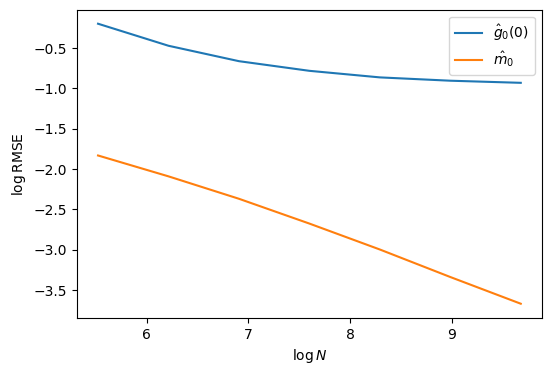

In [5]:
plt.figure(figsize=(6, 4))
for k in range(2):
    plt.plot(np.log(sample_sizes), np.log(rmse[:,k]), color=colors[k], label=names[k])
plt.xlabel(r'$\log N$')
plt.ylabel(r'$\log$' + 'RMSE')
plt.legend()

#for fmt in ['png', 'pdf']:
#    plt.savefig(f'figures_3/ml_rmse_1.{fmt}', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'RMSE convergence rate')

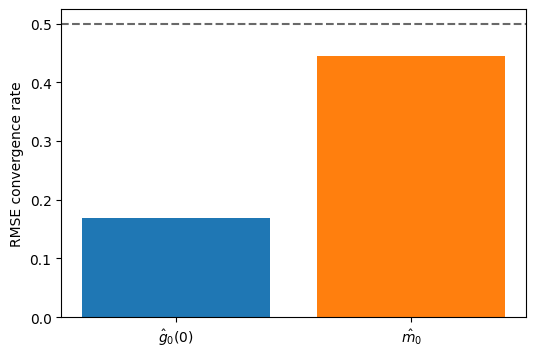

In [6]:
slopes = np.polyfit(np.log(sample_sizes), np.log(rmse), 1)[0,:]

plt.figure(figsize=(6, 4))
plt.bar(names, -slopes, color=colors)
plt.axhline(y=0.5, color='dimgrey', linestyle='--')
plt.ylabel('RMSE convergence rate')

#for fmt in ['png', 'pdf']:
#    plt.savefig(f'figures_3/ml_rmse_2.{fmt}', dpi=300, bbox_inches='tight')

In [7]:
-slopes

array([0.16815869, 0.44481421])